In [5]:
from math import exp
import numpy as np
from numpy.linalg import norm
import random
import scipy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.sparse import csgraph
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csgraph
from sklearn import cluster, datasets, mixture

%matplotlib inline

# create toy datasets for cluster experiments
n_samples = 100
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
datasets = [noisy_circles, noisy_moons]

X, y = datasets[0]
num_clusters = 2
sigma_sq = .01


def gaussian_kernel(x1, x2):
    # compute the affinity of samples X1, X2
    return np.exp(-(norm(x1-x2)**2)/(2*sigma_sq))

# construct affinity matrix
A = np.zeros((len(X), len(X)))
for i in range(len(X)-1):
    for j in range(i+1, len(X)):
        A[i,j] = gaussian_kernel(X[i], X[j])
        A[j,i] = A[i,j]

# print affinity matrix
print(A)

[[  0.00000000e+00   9.38423071e-13   3.55941842e-29 ...,   5.42498505e-26
    5.50746933e-15   1.03518004e-05]
 [  9.38423071e-13   0.00000000e+00   9.91657121e-45 ...,   2.12989220e-47
    8.01040137e-01   9.91286124e-19]
 [  3.55941842e-29   9.91657121e-45   0.00000000e+00 ...,   1.17274146e-01
    1.06703801e-47   2.35461902e-10]
 ..., 
 [  5.42498505e-26   2.12989220e-47   1.17274146e-01 ...,   0.00000000e+00
    7.55452978e-51   5.12380187e-09]
 [  5.50746933e-15   8.01040137e-01   1.06703801e-47 ...,   7.55452978e-51
    0.00000000e+00   3.15491600e-21]
 [  1.03518004e-05   9.91286124e-19   2.35461902e-10 ...,   5.12380187e-09
    3.15491600e-21   0.00000000e+00]]


In [6]:
# Construct diagonal degree matrix
D = np.zeros(A.shape)
for i in range(A.shape[0]):
    D[i,i] = np.sum(A[i,:])

print(D)

[[ 1.85622672  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.88363513  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          3.00113801 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  1.28167115  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.85410524  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          3.42166569]]


In [12]:
Dinvsq = np.sqrt(np.linalg.inv(D))

L = np.dot(Dinvsq, D-A)
L = np.dot(L, Dinvsq)

print(L)

[[  1.00000000e+00  -7.32734566e-13  -1.50806670e-29 ...,  -3.51718111e-26
   -4.37402120e-15  -4.10753804e-06]
 [ -7.32734566e-13   1.00000000e+00  -6.08950602e-45 ...,  -2.00139510e-47
   -9.22066188e-01  -5.70090431e-19]
 [ -1.50806670e-29  -6.08950602e-45   1.00000000e+00 ...,  -5.97958430e-02
   -6.66470931e-48  -7.34782620e-11]
 ..., 
 [ -3.51718111e-26  -2.00139510e-47  -5.97958430e-02 ...,   1.00000000e+00
   -7.22043629e-51  -2.44672543e-09]
 [ -4.37402120e-15  -9.22066188e-01  -6.66470931e-48 ...,  -7.22043629e-51
    1.00000000e+00  -1.84549690e-21]
 [ -4.10753804e-06  -5.70090431e-19  -7.34782620e-11 ...,  -2.44672543e-09
   -1.84549690e-21   1.00000000e+00]]


In [13]:
eigvals, eigvects = np.linalg.eigh(L)

best_eigens = [i for i in range(num_clusters)]

LX = np.zeros((L.shape[0],num_clusters))

#for i in range(num_clusters):
LX[:,:] = eigvects[:,best_eigens]

# normalize new eigenvector-column-matrix
LX = (LX.T / np.linalg.norm(LX, axis=1)).T
print(LX)
print("Eigenvalues:")
print(eigvals)

[[ 0.48016696 -0.87717711]
 [ 0.83694886 -0.5472811 ]
 [ 0.85353241  0.52103975]
 [ 0.85215276  0.5232931 ]
 [ 0.85653952  0.51608144]
 [ 0.63729707 -0.77061823]
 [ 0.85134517  0.52460595]
 [ 0.85683489  0.51559089]
 [ 0.96381377 -0.26657646]
 [ 0.88023639  0.47453545]
 [ 0.87002196  0.49301296]
 [ 0.85440729  0.51960387]
 [ 0.85683202  0.51559566]
 [ 0.84888767 -0.52857329]
 [ 0.42741035 -0.90405774]
 [ 0.87821926  0.47825823]
 [ 0.8534869   0.52111429]
 [ 0.85456957  0.51933694]
 [ 0.67706281 -0.73592523]
 [ 0.42425361 -0.90554341]
 [ 0.85300906  0.5218961 ]
 [ 0.88673246  0.46228296]
 [ 0.47671823 -0.87905616]
 [ 0.41889665 -0.90803392]
 [ 0.42427906 -0.90553149]
 [ 0.88682148  0.46211218]
 [ 0.85184836  0.52378848]
 [ 0.96541977 -0.26070035]
 [ 0.9726174  -0.23241211]
 [ 0.88495317  0.46568002]
 [ 0.48631995 -0.87378081]
 [ 0.42513141 -0.90513164]
 [ 0.85581212  0.51728678]
 [ 0.85206432  0.5234371 ]
 [ 0.41959743 -0.9077103 ]
 [ 0.87011928  0.49284119]
 [ 0.62423265 -0.7812385 ]
 

In [14]:
# Find the K largest eigenvectors of L
eigvals, eigvects = np.linalg.eigh(L)

best_eigens = [i for i in range(num_clusters)]
print(best_eigens)

LX = np.zeros((L.shape[0],num_clusters))

LX[:,:] = eigvects[:,best_eigens]

LX = (LX.T / np.linalg.norm(LX, axis=1)).T

print(LX)
print("Eigenvalues:")
print(eigvals)

[0, 1]
[[ 0.48016696 -0.87717711]
 [ 0.83694886 -0.5472811 ]
 [ 0.85353241  0.52103975]
 [ 0.85215276  0.5232931 ]
 [ 0.85653952  0.51608144]
 [ 0.63729707 -0.77061823]
 [ 0.85134517  0.52460595]
 [ 0.85683489  0.51559089]
 [ 0.96381377 -0.26657646]
 [ 0.88023639  0.47453545]
 [ 0.87002196  0.49301296]
 [ 0.85440729  0.51960387]
 [ 0.85683202  0.51559566]
 [ 0.84888767 -0.52857329]
 [ 0.42741035 -0.90405774]
 [ 0.87821926  0.47825823]
 [ 0.8534869   0.52111429]
 [ 0.85456957  0.51933694]
 [ 0.67706281 -0.73592523]
 [ 0.42425361 -0.90554341]
 [ 0.85300906  0.5218961 ]
 [ 0.88673246  0.46228296]
 [ 0.47671823 -0.87905616]
 [ 0.41889665 -0.90803392]
 [ 0.42427906 -0.90553149]
 [ 0.88682148  0.46211218]
 [ 0.85184836  0.52378848]
 [ 0.96541977 -0.26070035]
 [ 0.9726174  -0.23241211]
 [ 0.88495317  0.46568002]
 [ 0.48631995 -0.87378081]
 [ 0.42513141 -0.90513164]
 [ 0.85581212  0.51728678]
 [ 0.85206432  0.5234371 ]
 [ 0.41959743 -0.9077103 ]
 [ 0.87011928  0.49284119]
 [ 0.62423265 -0.7812

In [28]:
def initialize_clusters(points, k):
    """Initializes clusters as k randomly selected points from points."""
    return points[np.random.randint(points.shape[0], size=k)]
    
# Function for calculating the distance between centroids
def get_distances(centroid, points):
    """Returns the distance the centroid is from each data point in points."""
    return np.linalg.norm(points - centroid, axis=1)

k  ==  2
maxiter = 20

# Initialize our centroids by picking random data points
centroids = initialize_clusters(LX, k)

# Initialize the vectors in which we will store the
# assigned classes of each data point and the
# calculated distances from each centroid
classes = np.zeros(LX.shape[0], dtype=np.float64)
distances = np.zeros([LX.shape[0], k], dtype=np.float64)

# Loop for the maximum number of iterations
for i in range(maxiter):
    
    # Assign all points to the nearest centroid
    for i, c in enumerate(centroids):
        distances[:, i] = get_distances(c, LX)
        
    # Determine class membership of each point
    # by picking the closest centroid
    classes = np.argmin(distances, axis=1)
    
    # Update centroid location using the newly
    # assigned data point classes
    for c in range(k):
        centroids[c] = np.mean(LX[classes == c], 0)

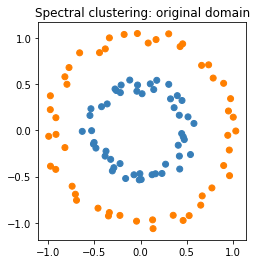

In [30]:
# plot results

def plot_results(X, y, fignum, title):
    # plot with true labels
    fig = plt.figure(fignum)
    plt.title(title)
    colors = ['#377eb8', '#ff7f00']
    y_colors = [colors[label] for label in y]
    plt.scatter(X[:,0], X[:,1], color=y_colors)
    plt.gca().set_aspect('equal')
    plt.show()
    
plot_results(X, classes, 3, "Spectral clustering: original domain")